# Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers

# Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.


*When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:*

*If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company*

*If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.*

*The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,*

**All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but on different stages of the process.


# Business Objective

Or purpose is to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.

**The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.**

# *Segment 1 -  Import the Libraries*

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Segment 2 - Fetch Data, Read Data and Analyze Data*

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.

In [3]:
#Read the data in pandas
df_app = pd.read_csv("application_data.csv")
df_pvapp = pd.read_csv("previous_application.csv")

In [4]:
##Setting notebook config to display all columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [7]:
#Checking for data-set structure
df_app.shape

(307511, 122)

In [8]:
#Validating if data-set has loaded correctly
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [9]:
#Working on Dataset with Random sample with Size 33 percent of actual population
# PS : Data is not stratified as TARGET Variable distribution in sample size is similar to population size
df_app_sample = df_app.sample(n=100000)

In [10]:
#Analyzing the Data Types of Columns
df_app_sample.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 263587 to 164570
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED     

# *Segment 3 - Fixing Data Types For Columns*

Checklist for fixing rows:
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing after Binning.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.

In [11]:
# Finding non unique values in sample data-set
df_app_sample.nunique().sort_values(ascending=False)

SK_ID_CURR           100000
EXT_SOURCE_2         65630 
EXT_SOURCE_1         41517 
DAYS_BIRTH           16967 
DAYS_REGISTRATION    14111 
                     ...   
FLAG_CONT_MOBILE     2     
FLAG_DOCUMENT_11     2     
FLAG_DOCUMENT_12     2     
FLAG_MOBIL           1     
FLAG_DOCUMENT_10     1     
Length: 122, dtype: int64

In [12]:
# Dropping columns from 40 to 90 as maxiumum values in most of the columns contains approximately 50 percent null values
df_app_sample.drop(columns=df_app_sample.iloc[:,40:90],axis=1, inplace=True)

In [13]:
#selecting number of columns to to be converted to Categorical
cols=[1,6,21,22,23,24,25,26,27,29,30,31,33,34,35,36,37,38,39]

In [14]:
# Column conversion from int/float to categorical, these are converted to Categorical as they having less than 40 unque values
for col in df_app_sample.columns[cols]:
    df_app_sample[col] = df_app_sample[col].astype('str')

In [15]:
# Column conversion from int/float to categorical
for col in df_app_sample.columns[46:72]:
    df_app_sample[col] = df_app_sample[col].astype('str')

In [16]:
# Verifying Data Frame after corrections in Data Types of Columns
df_app_sample.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 263587 to 164570
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   100000 non-null  int64  
 1   TARGET                       100000 non-null  object 
 2   NAME_CONTRACT_TYPE           100000 non-null  object 
 3   CODE_GENDER                  100000 non-null  object 
 4   FLAG_OWN_CAR                 100000 non-null  object 
 5   FLAG_OWN_REALTY              100000 non-null  object 
 6   CNT_CHILDREN                 100000 non-null  object 
 7   AMT_INCOME_TOTAL             100000 non-null  float64
 8   AMT_CREDIT                   100000 non-null  float64
 9   AMT_ANNUITY                  99998 non-null   float64
 10  AMT_GOODS_PRICE              99919 non-null   float64
 11  NAME_TYPE_SUITE              99595 non-null   object 
 12  NAME_INCOME_TYPE             100000 non-null  object 

## Deriving More informative columns from existing columns and forming modifying data

In [17]:
#Taking absolute value for age column as all values are in negative
#Create Column for Age in Years from Age in Days 
df_app_sample['DAYS_BIRTH']=np.abs(df_app_sample['DAYS_BIRTH'])
df_app_sample['AGE_YEARS'] = df_app_sample['DAYS_BIRTH']/365
df_app_sample['AGE_YEARS'].head()

263587    50.443836
3128      33.789041
151352    31.153425
57458     57.536986
228310    30.558904
Name: AGE_YEARS, dtype: float64

In [18]:
# Dropping existing column DAYS_BIRTH after creating new Column AGE_YEARS which is more meaningful
df_app_sample.drop('DAYS_BIRTH',axis=1,inplace=True)

In [19]:
# Taking absolute value of Employed days and creating new column as Years_employed
df_app_sample['DAYS_EMPLOYED']=np.abs(df_app_sample['DAYS_EMPLOYED'])
df_app_sample['YEARS_EMPLOYED'] = (df_app_sample['DAYS_EMPLOYED']/365).round(decimals = 2)
df_app_sample['YEARS_EMPLOYED'].head()

263587    5.50   
3128      2.07   
151352    2.41   
57458     1000.67
228310    2.67   
Name: YEARS_EMPLOYED, dtype: float64

In [20]:
# Dropping existing column DAYS_EMPLOYED after creating new Column YEARS_EMPLOYED which is more meaningful
df_app_sample.drop('DAYS_EMPLOYED',axis=1,inplace=True)

In [21]:
# Days Regsistration Data Conversion to Years
df_app_sample['DAYS_REGISTRATION']=np.abs(df_app_sample['DAYS_REGISTRATION'])
df_app_sample['DAYS_REGISTRATION'] = df_app_sample['DAYS_REGISTRATION']/365
df_app_sample['YEARS_REGISTRATION'] = df_app_sample['DAYS_REGISTRATION'].round(decimals = 2)

In [22]:
# Dropping existing columns after creating more meaning columns
df_app_sample.drop('DAYS_REGISTRATION',axis=1,inplace=True)

In [23]:
# Days id publish Data Conversion to Years
df_app_sample['DAYS_ID_PUBLISH']=np.abs(df_app_sample['DAYS_ID_PUBLISH'])
df_app_sample['DAYS_ID_PUBLISH'] = df_app_sample['DAYS_ID_PUBLISH']/365
df_app_sample['YEARS_ID_PUBLISH'] = df_app_sample['DAYS_ID_PUBLISH'].round(decimals = 2)

In [24]:
# Dropping existing columns after creating more meaning columns
df_app_sample.drop('DAYS_ID_PUBLISH',axis=1,inplace=True)

In [25]:
#DAYS_LAST_PHONE_CHANGE Data Converstion to Years
df_app_sample['DAYS_LAST_PHONE_CHANGE']=np.abs(df_app_sample['DAYS_LAST_PHONE_CHANGE'])
df_app_sample['YEARS_LAST_PHONE_CHANGE']=(df_app_sample['DAYS_LAST_PHONE_CHANGE']/365).round(decimals=2)

In [26]:
# Dropping existing column after creating more meaning columns
df_app_sample.drop('DAYS_LAST_PHONE_CHANGE',axis=1,inplace=True)

In [27]:
df_app_sample.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
263587,405188,0,Cash loans,F,Y,Y,0,292500.0,728460.0,44694.0,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,2.0,1,1,1,1,1,0,NaN,2.0,2,2,SATURDAY,15,0,0,0,0,0,0,No,3.0,1.0,3.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,50.443836,5.50,28.13,5.00,3.08
3128,103656,0,Cash loans,F,N,N,0,99000.0,545040.0,26640.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006305,nan,1,1,0,1,1,0,Sales staff,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,NaN,5.0,4.0,5.0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,33.789041,2.07,7.41,8.27,1.84
151352,275444,0,Cash loans,M,Y,N,2,135000.0,270000.0,14647.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.008625,15.0,1,1,0,1,0,1,Laborers,4.0,2,2,SATURDAY,10,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,8.0,31.153425,2.41,0.96,0.90,3.72
57458,166592,0,Cash loans,F,N,Y,0,112500.0,598486.5,19908.0,454500.0,Family,Pensioner,Secondary / secondary special,Separated,House / apartment,0.025164,nan,1,0,0,1,1,0,NaN,1.0,2,2,THURSDAY,10,0,0,0,0,0,0,No,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,57.536986,1000.67,26.68,11.95,1.10
228310,364453,1,Cash loans,F,N,Y,0,225000.0,675000.0,21906.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Rented apartment,0.022800,nan,1,1,0,1,1,0,Sales staff,2.0,2,2,MONDAY,9,0,0,0,1,1,0,No,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,30.558904,2.67,14.80,3.68,2.22


# *Segment 4 - Handling Null Values & Binning Categorical Data and Outliers Treatment*

In [28]:
100*df_app_sample['YEARS_EMPLOYED'].value_counts(normalize = True)

1000.67    17.981
0.55       0.183 
0.53       0.175 
0.59       0.165 
0.62       0.164 
           ...   
32.40      0.001 
29.05      0.001 
40.68      0.001 
28.37      0.001 
37.77      0.001 
Name: YEARS_EMPLOYED, Length: 3548, dtype: float64

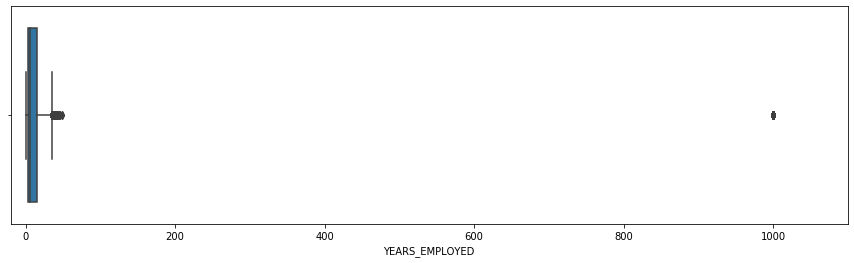

In [29]:
# Plotting above column YEARS_EMPLOYED in Box Plot 
plt.figure(figsize=(15,4))
plt.xlim(-20, 1100)
sns.boxplot(df_app_sample['YEARS_EMPLOYED'])
plt.show()

In [30]:
#From the above box plot it is clear that there is one value which is outlier and having ~ 18 percent of contribution in the overall dataset,
#hence imputing 1000.67 with median of the sample data
val=df_app_sample['YEARS_EMPLOYED'].median()
df_app_sample['YEARS_EMPLOYED']=df_app_sample['YEARS_EMPLOYED'].apply(lambda x:val if x==1000.67 else x)

In [31]:
# Analyzing own_car_age column
100*df_app_sample['OWN_CAR_AGE'].value_counts(dropna=False, normalize = True).head()

nan    65.993
7.0    2.363 
6.0    2.091 
3.0    2.070 
2.0    1.903 
Name: OWN_CAR_AGE, dtype: float64

In [32]:
#From above analysis, identified OWN_CAR_AGE has inconsistencies in data, fixing it 
df_app_sample['OWN_CAR_AGE']=df_app_sample['OWN_CAR_AGE'].apply(lambda x:np.NaN if x=='nan' else x)

In [33]:
#Can be seen from the below calculation that more than 50 percent values are null, hence dropping the OWN_CAR_AGE column
df_app_sample['OWN_CAR_AGE'].isnull().sum()

65993

In [34]:
#Analyzing Complete Data Set for Null Values
df_app_sample.isnull().sum()

SK_ID_CURR                     0    
TARGET                         0    
NAME_CONTRACT_TYPE             0    
CODE_GENDER                    0    
FLAG_OWN_CAR                   0    
FLAG_OWN_REALTY                0    
CNT_CHILDREN                   0    
AMT_INCOME_TOTAL               0    
AMT_CREDIT                     0    
AMT_ANNUITY                    2    
AMT_GOODS_PRICE                81   
NAME_TYPE_SUITE                405  
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             0    
NAME_HOUSING_TYPE              0    
REGION_POPULATION_RELATIVE     0    
OWN_CAR_AGE                    65993
FLAG_MOBIL                     0    
FLAG_EMP_PHONE                 0    
FLAG_WORK_PHONE                0    
FLAG_CONT_MOBILE               0    
FLAG_PHONE                     0    
FLAG_EMAIL                     0    
OCCUPATION_TYPE                31451
CNT_FAM_MEMBERS                0    
REGION_RATING_CLIENT           0    
R

In [35]:
#Fixing data in Occupation Type Column
100*df_app_sample['OCCUPATION_TYPE'].value_counts(dropna=False, normalize = True).head()

NaN            31.451
Laborers       17.927
Sales staff    10.511
Core staff     8.820 
Managers       6.855 
Name: OCCUPATION_TYPE, dtype: float64

In [36]:
df_app_sample['OCCUPATION_TYPE'].describe()

count     68549   
unique    18      
top       Laborers
freq      17927   
Name: OCCUPATION_TYPE, dtype: object

In [37]:
#Fixing Null Values for Occupation Type Column
val=df_app_sample['OCCUPATION_TYPE'].mode()[0]
df_app_sample['OCCUPATION_TYPE'].fillna(val,inplace=True)

In [38]:
#Analyzing emergencystate mode column
100*df_app_sample['EMERGENCYSTATE_MODE'].value_counts(dropna=False, normalize = True)

No     51.971
NaN    47.243
Yes    0.786 
Name: EMERGENCYSTATE_MODE, dtype: float64

In [39]:
#As almost 50 percent of the data is having null values, dropping the column from the dataframe
df_app_sample.drop('EMERGENCYSTATE_MODE',axis=1,inplace=True)

In [40]:
# From above info, further analyzing below columns
df_app_sample['AMT_REQ_CREDIT_BUREAU_HOUR']=df_app_sample['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda x: np.NaN if x=='nan' else x)
df_app_sample['AMT_REQ_CREDIT_BUREAU_DAY']=df_app_sample['AMT_REQ_CREDIT_BUREAU_DAY'].apply(lambda x: np.NaN if x=='nan' else x)
df_app_sample['AMT_REQ_CREDIT_BUREAU_WEEK']=df_app_sample['AMT_REQ_CREDIT_BUREAU_WEEK'].apply(lambda x: np.NaN if x=='nan' else x)
df_app_sample['AMT_REQ_CREDIT_BUREAU_MON']=df_app_sample['AMT_REQ_CREDIT_BUREAU_MON'].apply(lambda x: np.NaN if x=='nan' else x)
df_app_sample['AMT_REQ_CREDIT_BUREAU_QRT']=df_app_sample['AMT_REQ_CREDIT_BUREAU_QRT'].apply(lambda x: np.NaN if x=='nan' else x)
df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR']=df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(lambda x: np.NaN if x=='nan' else x)

In [41]:
100*df_app_sample['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(dropna=False, normalize = True)

0.0    86.021
NaN    13.462
1.0    0.503 
2.0    0.012 
3.0    0.002 
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [42]:
#As maximum values in column AMT_REQ_CREDIT_BUREAU_HOUR are 0 and rest are NaN except one, so this column can be dropped
#Before dropping this column description of column was also taken into consideration from columns info data
df_app_sample.drop('AMT_REQ_CREDIT_BUREAU_HOUR',axis=1,inplace=True)

In [43]:
100*df_app_sample['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(dropna=False, normalize = True)

0.0    86.052
NaN    13.462
1.0    0.422 
2.0    0.031 
3.0    0.015 
4.0    0.009 
6.0    0.006 
5.0    0.003 
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [44]:
#As maximum values in column AMT_REQ_CREDIT_BUREAU_DAY are 0 and rest are NaN except one, so this column can be dropped
#Before dropping this column description of column was also taken into consideration from columns info data
df_app_sample.drop('AMT_REQ_CREDIT_BUREAU_DAY',axis=1,inplace=True)

In [45]:
#Similar operations on remaining AMT columns as behaviour is also same as above 2 columns which are analyzed
df_app_sample.drop('AMT_REQ_CREDIT_BUREAU_WEEK',axis=1,inplace=True)
df_app_sample.drop('AMT_REQ_CREDIT_BUREAU_MON',axis=1,inplace=True)
df_app_sample.drop('AMT_REQ_CREDIT_BUREAU_QRT',axis=1,inplace=True)

In [46]:
df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR']=pd.to_numeric(df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR'],errors='coerce')

In [47]:
#Checking column AMT_REQ_CREDIT_BUREAU_YEAR and filled na with median values
df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()
val=df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
df_app_sample['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(val, axis=None, inplace=True)

## 4.2 Binning of Categorical Data, wherever possible

In [48]:
#Analyzing Total Income column
df_app_sample['AMT_INCOME_TOTAL'].describe()

count    1.000000e+05
mean     1.694693e+05
std      3.846600e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [49]:
#Bucketing income in different buckets
df_app_sample['AMT_INCOME_TOTAL_BUCKET']=pd.cut(df_app_sample['AMT_INCOME_TOTAL'], bins = [31500, 50000, 100000, 150000, 200000, 250000,300000,350000,400000,450000,500000,550000], labels = ["Low", "HLow", "Avg", "AboveAvg", "High",'AbvHigh','VeryHigh','VVHigh','VVVHigh','VVVVHigh','SuperRich'])

In [50]:
#Dropping AMT_INCOME_TOTAL column as Categorical AMT_INCOME_TOTAL_BUCKET Column will help in better analysis
df_app_sample.drop('AMT_INCOME_TOTAL',axis=1,inplace=True)

In [51]:
#Bucketing Amount Credit in different buckets
df_app_sample['AMT_CREDIT_BUCKET']=pd.cut(df_app_sample['AMT_CREDIT'], bins = [0, 50000, 100000, 200000, 300000, 500000,1000000,1500000,2000000,3000000,3500000], labels = ["Low", "HLow", "Avg", "AboveAvg", "High",'AbvHigh','VeryHigh','VVHigh','VVVHigh','SuperRich'])

In [52]:
#Dropping Amount Credit column as AMT_CREDIT_BUCKET Column will provide better analysis
df_app_sample.drop('AMT_CREDIT',axis=1,inplace=True)

In [53]:
#Analyzing Amount Annuity column
df_app_sample['AMT_ANNUITY'].describe()

count    99998.000000 
mean     27138.019290 
std      14460.204542 
min      1615.500000  
25%      16551.000000 
50%      24903.000000 
75%      34632.000000 
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [54]:
#Bucketing Amount Annuity in different buckets
df_app_sample['AMT_ANNUITY_BUCKET']=pd.cut(df_app_sample['AMT_ANNUITY'], bins = [0, 5000, 10000, 25000, 50000, 100000,120000], labels = ["low", "avg", "avg+", "High",'VeryHigh','Highest'])

In [55]:
#Dropping Amount Annuity column as Categorical Bucket Column will provide better analysis
df_app_sample.drop('AMT_ANNUITY',axis=1,inplace=True)

In [56]:
#Analyzing Amount Goods Price column
df_app_sample['AMT_GOODS_PRICE'].describe()

count    9.991900e+04
mean     5.386878e+05
std      3.690416e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [57]:
#Bucketing Amount Goods Price in different buckets
df_app_sample['AMT_GOODS_PRICE_BUCKET']=pd.cut(df_app_sample['AMT_GOODS_PRICE'], bins = [0, 50000, 100000, 200000, 300000, 500000,1000000,1500000,2000000,3000000,3500000], labels = ["low", "HLow", "avg", "avg+", "High",'AbvHigh','VeryHigh','VVHigh','VVVHigh','Highest'])

In [58]:
#Dropping Amount Goods Price column as AMT_GOODS_PRICE_BUCKET Column will provide better analysis
df_app_sample.drop('AMT_GOODS_PRICE',axis=1,inplace=True)

## 4.3 Standardization of Catergorical Values and Null Value Treatment

In [59]:
#Analyzing NAME_TYPE_SUITE column for values
100*df_app_sample['NAME_TYPE_SUITE'].value_counts(dropna=False, normalize = True)

Unaccompanied      80.863
Family             13.047
Spouse, partner    3.693 
Children           1.087 
Other_B            0.535 
NaN                0.405 
Other_A            0.271 
Group of people    0.099 
Name: NAME_TYPE_SUITE, dtype: float64

In [60]:
df_app_sample['NAME_TYPE_SUITE'].describe()

count     99595        
unique    7            
top       Unaccompanied
freq      80863        
Name: NAME_TYPE_SUITE, dtype: object

In [61]:
#Standardizing Column Values
df_app_sample['NAME_TYPE_SUITE'] = df_app_sample['NAME_TYPE_SUITE'].replace('Unaccompanied','Single')
df_app_sample['NAME_TYPE_SUITE'] = df_app_sample['NAME_TYPE_SUITE'].replace('Spouse, partner','Married without Kids')
df_app_sample['NAME_TYPE_SUITE'] = df_app_sample['NAME_TYPE_SUITE'].replace('Children','Family')
df_app_sample['NAME_TYPE_SUITE'] = df_app_sample['NAME_TYPE_SUITE'].fillna('Single')

In [62]:
100*df_app_sample['NAME_TYPE_SUITE'].value_counts(dropna=False, normalize = True)

Single                  81.268
Family                  14.134
Married without Kids    3.693 
Other_B                 0.535 
Other_A                 0.271 
Group of people         0.099 
Name: NAME_TYPE_SUITE, dtype: float64

In [63]:
#Analyzing NAME_INCOME_TYPE column for values
100*df_app_sample['NAME_INCOME_TYPE'].value_counts(dropna=False, normalize = True)

Working                 51.591
Commercial associate    23.228
Pensioner               17.981
State servant           7.183 
Student                 0.007 
Unemployed              0.005 
Businessman             0.004 
Maternity leave         0.001 
Name: NAME_INCOME_TYPE, dtype: float64

In [64]:
#Standardizing Column Values
df_app_sample['NAME_INCOME_TYPE'] = df_app_sample['NAME_INCOME_TYPE'].replace('Working','Salaried - Private')
df_app_sample['NAME_INCOME_TYPE'] = df_app_sample['NAME_INCOME_TYPE'].replace('State servant','Salaried - Government')

In [65]:
100*df_app_sample['NAME_INCOME_TYPE'].value_counts(dropna=False, normalize = True)

Salaried - Private       51.591
Commercial associate     23.228
Pensioner                17.981
Salaried - Government    7.183 
Student                  0.007 
Unemployed               0.005 
Businessman              0.004 
Maternity leave          0.001 
Name: NAME_INCOME_TYPE, dtype: float64

In [66]:
#Analyzing NAME_EDUCATION_TYPE Column
100*df_app_sample['NAME_EDUCATION_TYPE'].value_counts(dropna=False, normalize = True)

Secondary / secondary special    71.138
Higher education                 24.220
Incomplete higher                3.345 
Lower secondary                  1.241 
Academic degree                  0.056 
Name: NAME_EDUCATION_TYPE, dtype: float64

In [67]:
#Standardizing Column Values
df_app_sample['NAME_EDUCATION_TYPE'] = df_app_sample['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special','Secondary')
df_app_sample['NAME_EDUCATION_TYPE'] = df_app_sample['NAME_EDUCATION_TYPE'].replace('Higher education','Post Graduate and Above')

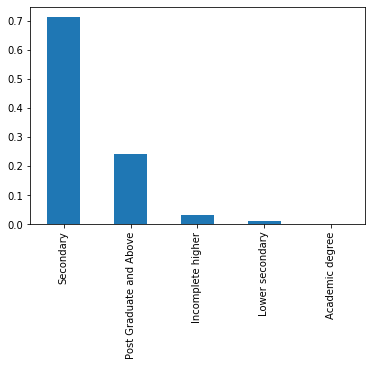

In [68]:
df_app_sample['NAME_EDUCATION_TYPE'].value_counts(dropna=False, normalize = True).plot.bar()
plt.show()

In [69]:
#Analyzing NAME_FAMILY_STATUS Column
100*df_app_sample['NAME_FAMILY_STATUS'].value_counts(dropna=False, normalize = True)

Married                 63.815
Single / not married    14.827
Civil marriage          9.690 
Separated               6.453 
Widow                   5.215 
Name: NAME_FAMILY_STATUS, dtype: float64

In [70]:
#Standardizing column values
df_app_sample['NAME_FAMILY_STATUS'] = df_app_sample['NAME_FAMILY_STATUS'].replace('Civil marriage','Married')
df_app_sample['NAME_FAMILY_STATUS'] = df_app_sample['NAME_FAMILY_STATUS'].replace('Single / not married','Single')

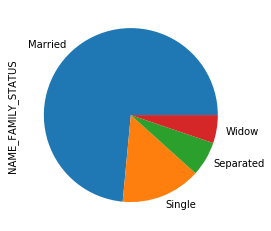

In [71]:
df_app_sample['NAME_FAMILY_STATUS'].value_counts(dropna=False, normalize = True).plot.pie()
plt.show()

In [72]:
#Analyzing NAME_HOUSING_TYPE Column
100*df_app_sample['NAME_HOUSING_TYPE'].value_counts(dropna=False, normalize = True)

House / apartment      88.626
With parents           4.910 
Municipal apartment    3.665 
Rented apartment       1.570 
Office apartment       0.857 
Co-op apartment        0.372 
Name: NAME_HOUSING_TYPE, dtype: float64

In [73]:
df_app_sample['NAME_HOUSING_TYPE'] = df_app_sample['NAME_HOUSING_TYPE'].replace('House / apartment','Own Apartment')
df_app_sample['NAME_HOUSING_TYPE'] = df_app_sample['NAME_HOUSING_TYPE'].replace('With parents','Parents Apartment')

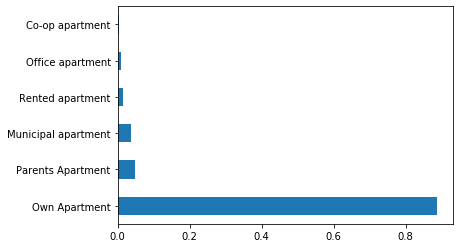

In [74]:
df_app_sample['NAME_HOUSING_TYPE'].value_counts(dropna=False, normalize = True).plot.barh()
plt.show()

# *Segment 5 - Analyzing Cleaned Data set*

## 5.1 Data Imbalance

In [75]:
#From the below calculation we can see there is data imbalance in which approximately 90 percent data is No Defaulter and approx.
#10 is defaulter
100*df_app_sample['TARGET'].value_counts(dropna = False, normalize=True)

0    91.878
1    8.122 
Name: TARGET, dtype: float64

In [78]:
#Separating both defaulters and non-defaulters
df_app_sample_timely_payers = df_app_sample[df_app_sample['TARGET']== '0']
df_app_sample_defaulting_payers = df_app_sample[df_app_sample['TARGET']== '1']

## 5.2 Identifying Correlation

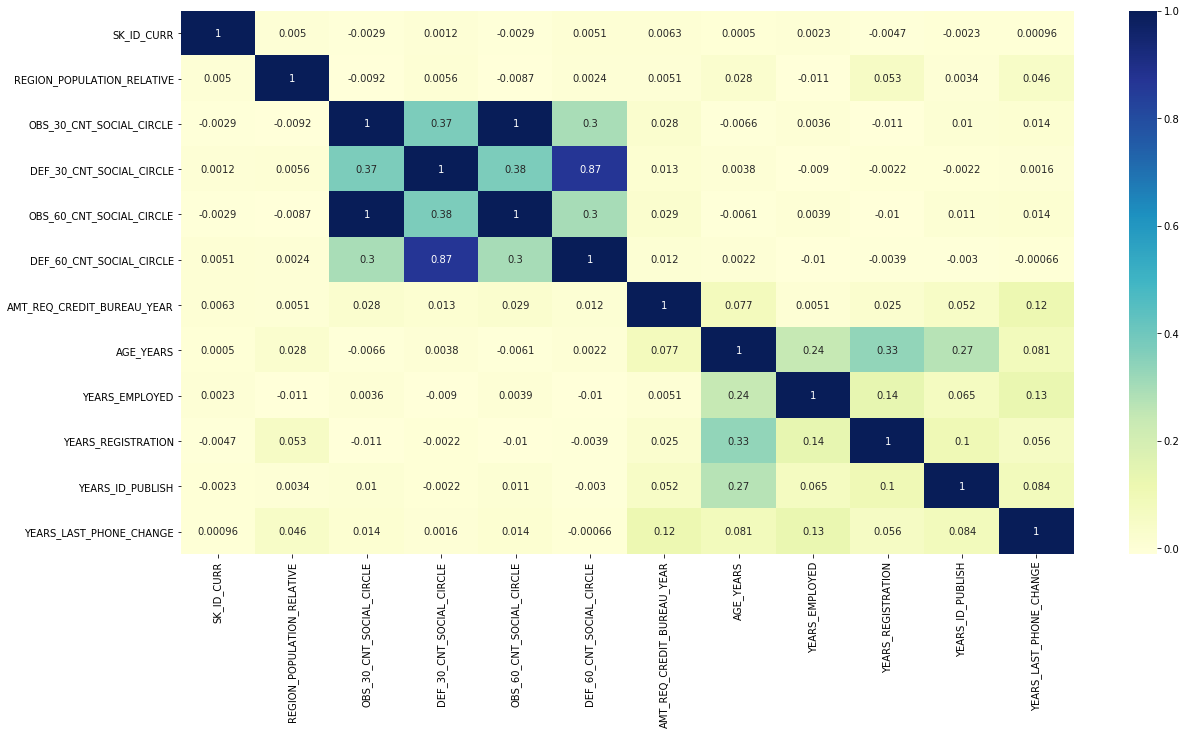

In [79]:
#Plotting the heatmap showing relations between different variables
plt.figure(figsize=(20,10))
sns.heatmap(df_app_sample_timely_payers.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [80]:
#AS can be seen from the above heatmap that (DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE) and 
#(OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE) are correlating fully,hence one of the columns can be dropped
df_app_sample_defaulting_payers.drop('DEF_30_CNT_SOCIAL_CIRCLE',axis=1,inplace=True)
df_app_sample_defaulting_payers.drop('OBS_30_CNT_SOCIAL_CIRCLE',axis=1,inplace=True)

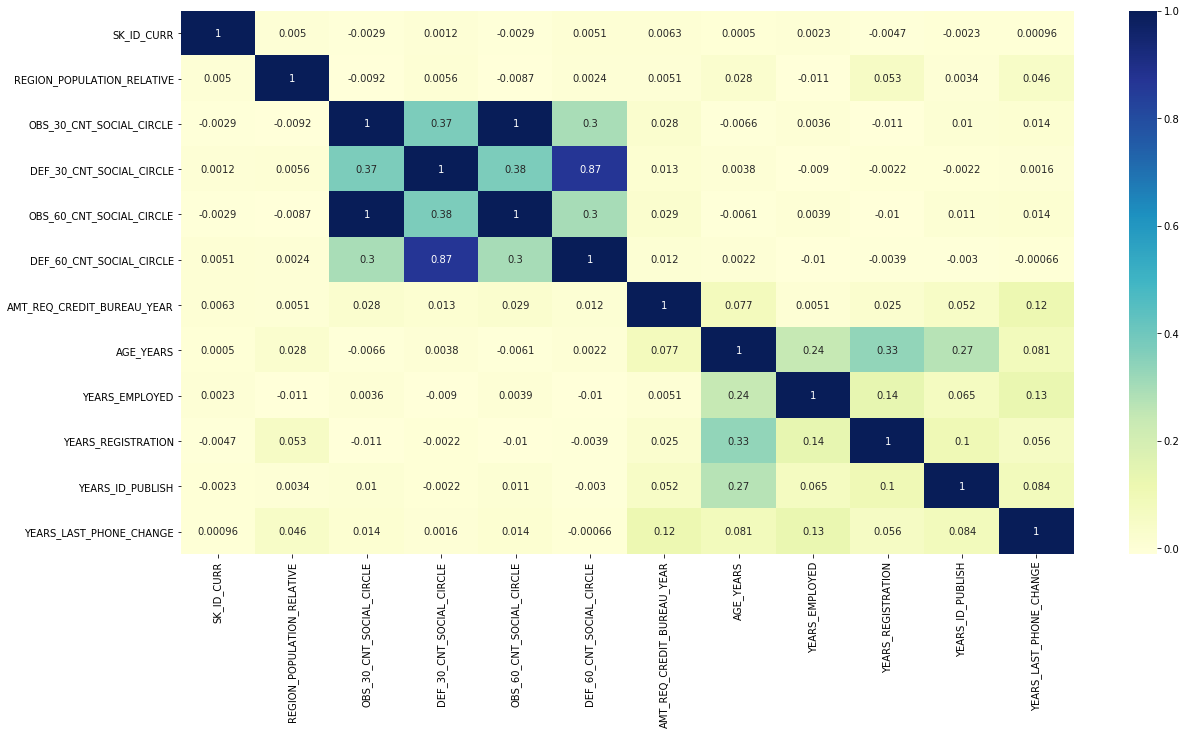

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(df_app_sample_timely_payers.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [82]:
df_app_sample_timely_payers.drop('OBS_30_CNT_SOCIAL_CIRCLE',axis=1,inplace=True)

In [83]:
df_app_sample_defaulting_payers.corr().unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,REGION_POPULATION_RELATIVE,-0.000745
2,SK_ID_CURR,OBS_60_CNT_SOCIAL_CIRCLE,0.010817
3,SK_ID_CURR,DEF_60_CNT_SOCIAL_CIRCLE,-0.012260
4,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_YEAR,0.002398
5,SK_ID_CURR,AGE_YEARS,-0.021927
6,SK_ID_CURR,YEARS_EMPLOYED,-0.000078
7,SK_ID_CURR,YEARS_REGISTRATION,-0.017912
8,SK_ID_CURR,YEARS_ID_PUBLISH,0.001457
9,SK_ID_CURR,YEARS_LAST_PHONE_CHANGE,-0.013722


In [84]:
#From the below figure it can been seen there is hardly significant relation between any variables among the defaulters
corr=df_app_sample_defaulting_payers.corr()
corr_df_app_sample_defaulting_payers=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df_app_sample_defaulting_payers=corr_df_app_sample_defaulting_payers.unstack().reset_index().dropna(subset=[0])
corr_df_app_sample_defaulting_payers.columns=['VAR1', 'VAR2', 'Correlation_Value']
corr_df_app_sample_defaulting_payers['Corr_abs']=abs(corr_df_app_sample_defaulting_payers['Correlation_Value'])
corr_df_app_sample_defaulting_payers.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_app_sample_defaulting_payers

,VAR1,VAR2,Correlation_Value,Corr_abs
65,YEARS_EMPLOYED,AGE_YEARS,0.288423,0.288423
75,YEARS_REGISTRATION,AGE_YEARS,0.283385,0.283385
32,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.270959,0.270959
85,YEARS_ID_PUBLISH,AGE_YEARS,0.265657,0.265657
96,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,0.152366,0.152366
76,YEARS_REGISTRATION,YEARS_EMPLOYED,0.131627,0.131627
94,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,0.120823,0.120823
95,YEARS_LAST_PHONE_CHANGE,AGE_YEARS,0.120102,0.120102
98,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,0.117751,0.117751
86,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.103591,0.103591


In [85]:
#From the below table it can be seen that there is high corelation between variables DEF_60_CNT_SOCIAL_CIRCLE and 
#DEF_30_CNT_SOCIAL_CIRCLE
corr=df_app_sample_timely_payers.corr()
corr_df_app_sample_timely_payers=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df_app_sample_timely_payers=corr_df_app_sample_timely_payers.unstack().reset_index().dropna(subset=[0])
corr_df_app_sample_timely_payers.columns=['VAR1', 'VAR2', 'Correlation_Value']
corr_df_app_sample_timely_payers['Corr_abs']=abs(corr_df_app_sample_timely_payers['Correlation_Value'])
corr_df_app_sample_timely_payers.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_app_sample_timely_payers

,VAR1,VAR2,Correlation_Value,Corr_abs
46,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.866511,0.866511
35,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.375939,0.375939
94,YEARS_REGISTRATION,AGE_YEARS,0.333710,0.333710
47,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.298745,0.298745
105,YEARS_ID_PUBLISH,AGE_YEARS,0.271163,0.271163
83,YEARS_EMPLOYED,AGE_YEARS,0.244811,0.244811
95,YEARS_REGISTRATION,YEARS_EMPLOYED,0.137303,0.137303
117,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,0.126035,0.126035
115,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,0.115156,0.115156
107,YEARS_ID_PUBLISH,YEARS_REGISTRATION,0.101183,0.101183


# *Segment 6 - Univariate, Bivariate Analysis*

6.1 Univariate:
- Continuous Variable
- Categorical Variable


### *Univariate Continuous*

### For single/individual columns we have done univariate analysis and standardization of values in section 4.3

### Below is demonstration of Univariate Analysis between Defaulters and Non-Defaulters

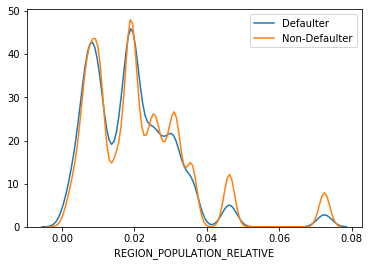

In [86]:
#Distribution plot between REGION_POPULATION_RELATIVE for Defaulters and Non-Defaulters

sns.distplot(df_app_sample_defaulting_payers['REGION_POPULATION_RELATIVE'],hist=False,label='Defaulter')
sns.distplot(df_app_sample_timely_payers['REGION_POPULATION_RELATIVE'],hist=False,label='Non-Defaulter')
plt.show()

* Inference : No Major impact of REGION_POPULATION_RELATIVE as both Defaulter and non-defaulters are showing same variation for REGION_POPULATION_RELATIVE

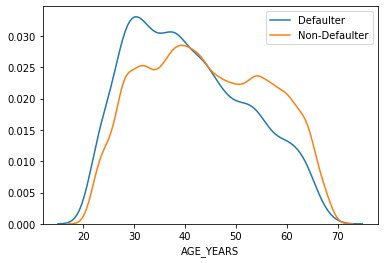

In [87]:
#Distribution plot between AGE_YEARS for Defaulters and Non-Defaulters

sns.distplot(df_app_sample_defaulting_payers['AGE_YEARS'],hist=False,label='Defaulter')
sns.distplot(df_app_sample_timely_payers['AGE_YEARS'],hist=False,label='Non-Defaulter')
plt.show()

* Inference: From the above graph it can be inferred that Distribution with higher age groups are non-defaulters

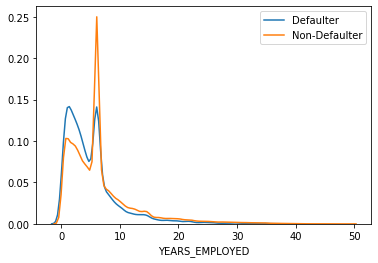

In [88]:
#Distribution plot between YEARS_EMPLOYED for Defaulters and Non-Defaulters

sns.distplot(df_app_sample_defaulting_payers['YEARS_EMPLOYED'],hist=False,label='Defaulter')
sns.distplot(df_app_sample_timely_payers['YEARS_EMPLOYED'],hist=False,label='Non-Defaulter')
plt.show()

* Inference : From the above graph it is inferred that population with experience less than 5 years tend to default more and after 10 years of work experience are less likely to default.

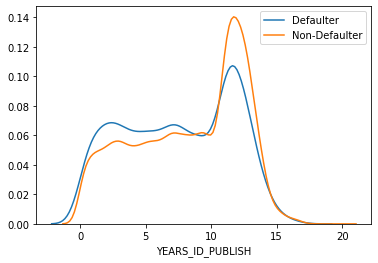

In [89]:
#Distribution plot between YEARS_ID_PUBLISH for Defaulters and Non-Defaulters

sns.distplot(df_app_sample_defaulting_payers['YEARS_ID_PUBLISH'],hist=False,label='Defaulter')
sns.distplot(df_app_sample_timely_payers['YEARS_ID_PUBLISH'],hist=False,label='Non-Defaulter')
plt.show()

* Inference : From the above graph it can be inferred that Non-Defaulters comparatively have YEARS_ID_PUBLISH betweeen range 10 to 15 years

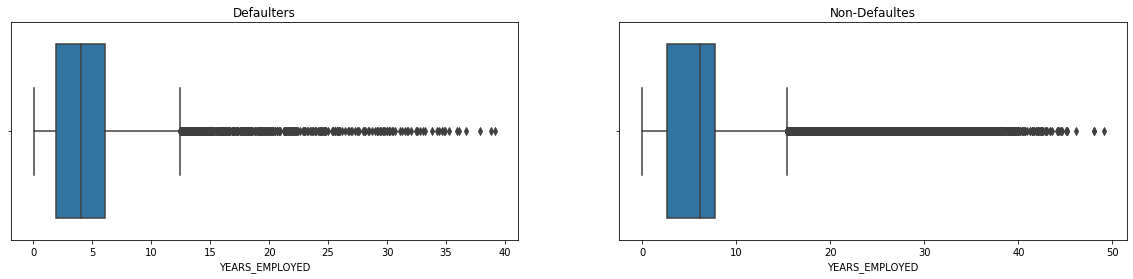

In [90]:
# Boxplot between YEARS_EMPLOYED for Defaulters and Non-Defaulters

plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.boxplot(df_app_sample_defaulting_payers['YEARS_EMPLOYED'])

plt.subplot(1,2,2)
plt.title("Non-Defaultes")
sns.boxplot(df_app_sample_timely_payers['YEARS_EMPLOYED'])
plt.show()

* Inference : From the above Box Plot one key thing which can be inferred is having more exprienced people are Non-Defaulters specifically in the range of 15 to 40 years, so company should be targettinng more in this work exprience range

### *Univariate Categorical*

### **As Data Provided is not stratified and population distribution is uneven on basis of certain feilds such as Occupation Type, Relationship Status, Income Bracket etc, we have taken ratios of default to non default samples to derive inference**

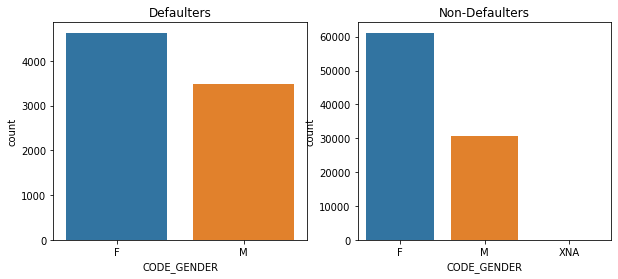

In [91]:
# Analyzing Male/Female distribution in for Defaulters/Non Defaulters Ratio

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(df_app_sample_defaulting_payers['CODE_GENDER'])


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(df_app_sample_timely_payers['CODE_GENDER'])
plt.show()

* Inference : Above graph shows among Defaulters Males are at high percentage in defaulters as Females prcentage is showing same in both the graphs

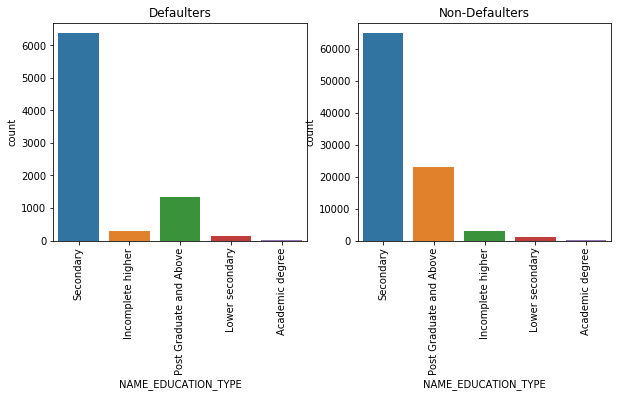

In [92]:
# Analyzing impact of NAME_EDUCATION_TYPE on sample distribution for Defaulters/Non Defaulters Ratio

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(df_app_sample_defaulting_payers['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(df_app_sample_timely_payers['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.show()


* Inference : Higher the education level i.e. Post Graduate and above have less chances of defaulting

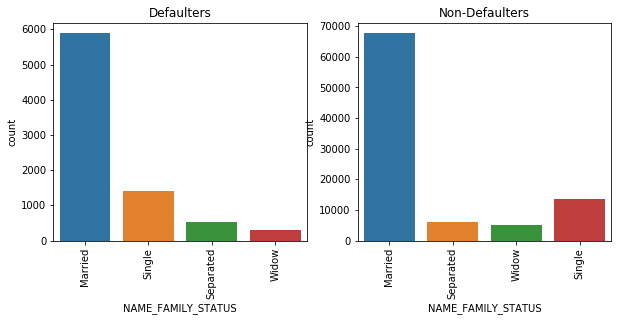

In [93]:
# Analyzing impact of Sample Popuation Relationship Status on sample distribution for Defaulters/Non Defaulters Ratio

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(df_app_sample_defaulting_payers['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(df_app_sample_timely_payers['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)
plt.show()

* Inference : Among Defaulters Married People have higher percentage than other categories

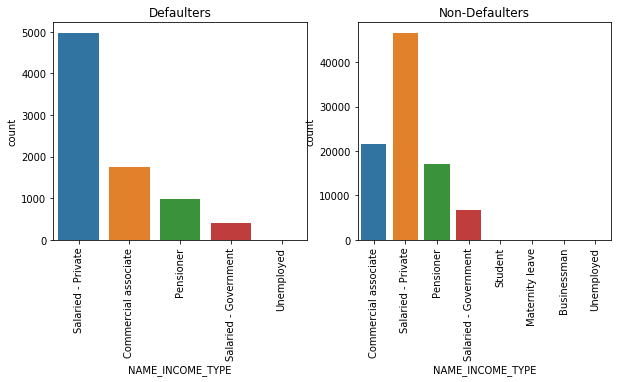

In [94]:
# Analyzing impact of occupation on Defaulters and Non-Defaulters 

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(df_app_sample_defaulting_payers['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(df_app_sample_timely_payers['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.show()

* Inference : Salaried Government Employeed and Commercial Associates has Higher Defaulters to Non Defaulters Ratio 

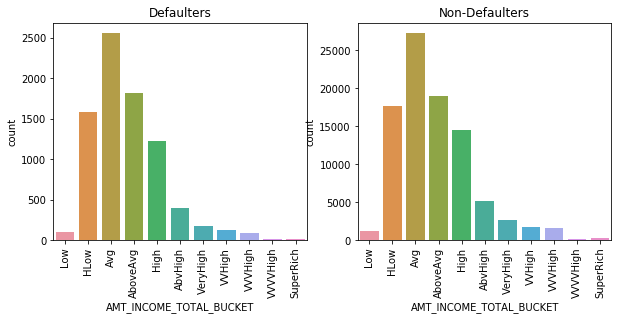

In [95]:
# Analyzing impact of salary/income/earnings on Defaulters and Non Defaulters population

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=90)
sns.countplot(df_app_sample_defaulting_payers['AMT_INCOME_TOTAL_BUCKET'])


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(df_app_sample_timely_payers['AMT_INCOME_TOTAL_BUCKET'])
plt.xticks(rotation=90)
plt.show()

* Inference - Based on Ratio if we look closely in graph Population with AbvHigh binning bracket which was for income range in 250000-300000 are defaulting more

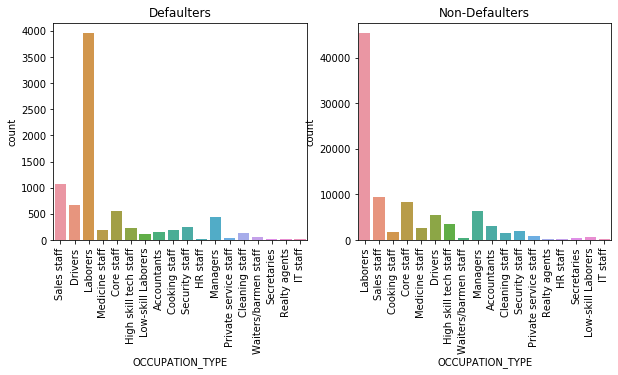

In [96]:
# Analyzing impact of occupation/profession on Defaulters and Non Defaulters population

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=90)
sns.countplot(df_app_sample_defaulting_payers['OCCUPATION_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(df_app_sample_timely_payers['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

* Inference - Drivers, Sales Staff, Security Staff ratio for default to non-default is on higher side and should be targeted less in comparison to other occupations

## 6.2 Bivariate Analysis


### Bivariate Analysis:
- Conti-Conti
- Categorical-Categorical
- Conti-Categorical

### Bivariate Continuous - Continuous

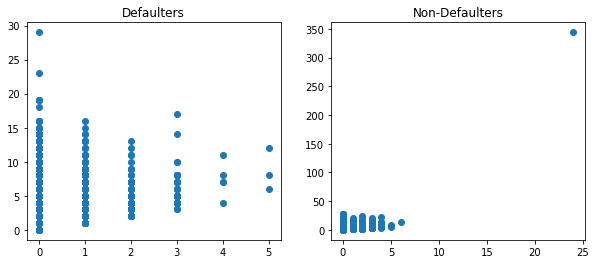

In [97]:
# Analyzing impact of observation of client's social surroundings with observable 60 DPD with Age on Defaulters and Non Defaulters

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.scatter(df_app_sample_defaulting_payers['DEF_60_CNT_SOCIAL_CIRCLE'], df_app_sample_defaulting_payers['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.scatter(df_app_sample_timely_payers['DEF_60_CNT_SOCIAL_CIRCLE'], df_app_sample_timely_payers['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

* Inference : Both the variables have strong relationship but comparatively among Non-Defaulters both are having much stronger relationship

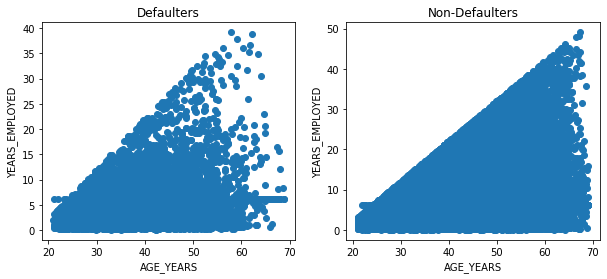

In [98]:
# Analyzing impact of Years Employeed with Age on Defaulters and Non Defaulters

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.scatter(df_app_sample_defaulting_payers['AGE_YEARS'], df_app_sample_defaulting_payers['YEARS_EMPLOYED'])
plt.xlabel('AGE_YEARS')
plt.ylabel('YEARS_EMPLOYED')

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.scatter(df_app_sample_timely_payers['AGE_YEARS'], df_app_sample_timely_payers['YEARS_EMPLOYED'])
plt.xlabel('AGE_YEARS')
plt.ylabel('YEARS_EMPLOYED')
plt.show()

* Inference : Population on higher age side with more number of years of experience tends to be more stable in paying off loans in timely manner

### Bivariate Continuous - Categorical

### **As Data Provided is not stratified and population distribution is uneven on basis of certain fields such as Occupation Type, Relationship Status, Income Bracket etc, we have taken ratios of default to non default samples to derive inference**

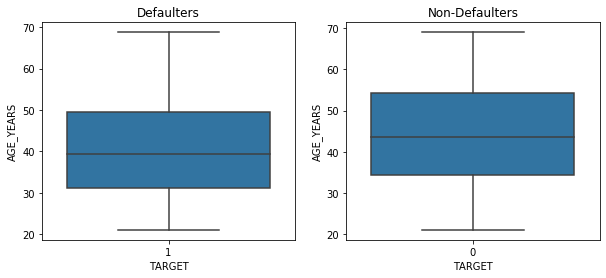

In [99]:
# Analyzing Age Factor with Defaulters vs Non Defaulters population

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.boxplot(x = "TARGET", y = 'AGE_YEARS', data = df_app_sample_defaulting_payers)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.boxplot(x = "TARGET", y = 'AGE_YEARS', data = df_app_sample_timely_payers)
plt.show()

* Inference : Median Age among Non-Defaultres is 45 whereas in the case of Defaulters it is 40

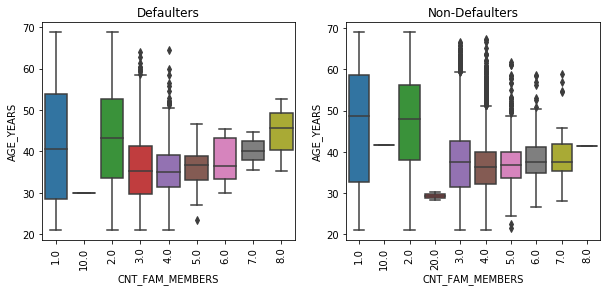

In [100]:
# Analyzing Number of Children count vs Age with Defaulters vs Non Defaulters population

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = "CNT_FAM_MEMBERS", y = 'AGE_YEARS', data = df_app_sample_defaulting_payers)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = "CNT_FAM_MEMBERS", y = 'AGE_YEARS', data = df_app_sample_timely_payers)
plt.show()

* Inference - Population which perfer kids after 30's tend to default less.

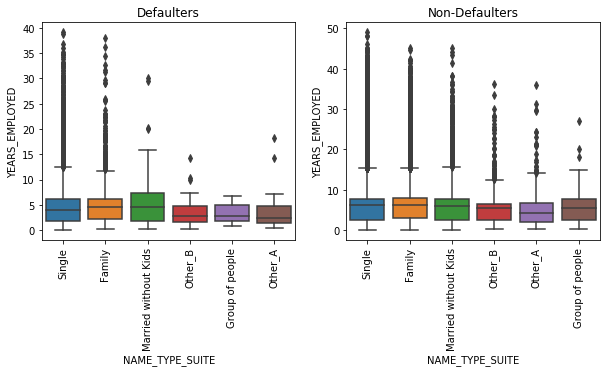

In [101]:
# Analyzing Relationship Status/Family vs Years Employed for Defaulters and Non Defaulters population

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = "NAME_TYPE_SUITE", y = 'YEARS_EMPLOYED', data = df_app_sample_defaulting_payers)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = "NAME_TYPE_SUITE", y = 'YEARS_EMPLOYED', data = df_app_sample_timely_payers)
plt.show()

* Inference - Population with higher experience irrespective of their family status tend to default less and from the Business perspective should be targetted

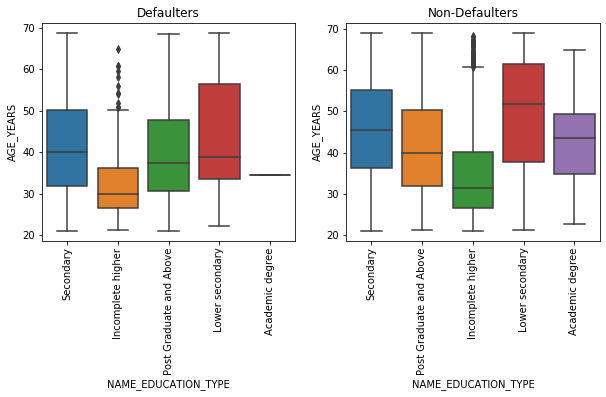

In [102]:
# Analyzing Education Type vs Age with Defaulters vs Non Defaulters population

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AGE_YEARS', data = df_app_sample_defaulting_payers)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AGE_YEARS', data = df_app_sample_timely_payers)
plt.show()

* Inference - Population with Lower Secondary, Secondary and Incomplete High School education tends to default at high age as well

### Bivariate Categorical-Categorical

### **As Data Provided is not stratified and population distribution is uneven on basis of certain feilds such as Occupation Type, Relationship Status, Income Bracket etc, we have taken ratios of default to non default samples to derive inference**

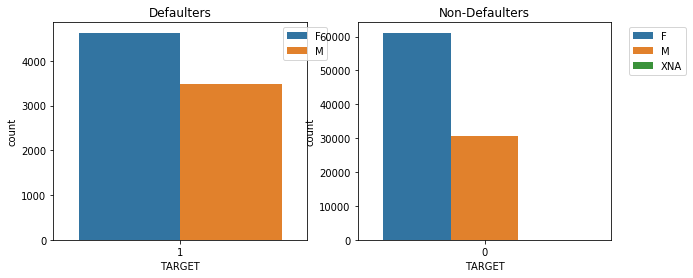

In [103]:
# Analyzing effect of Male/Female with Defaulters/Non-Defaulters

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(x = 'TARGET', hue = 'CODE_GENDER', data = df_app_sample_defaulting_payers)
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper right')

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(x = 'TARGET', hue = 'CODE_GENDER', data = df_app_sample_timely_payers)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Inference : Looking at the Ratio of Defaulters, Male Population is contributing more as Defaulters.

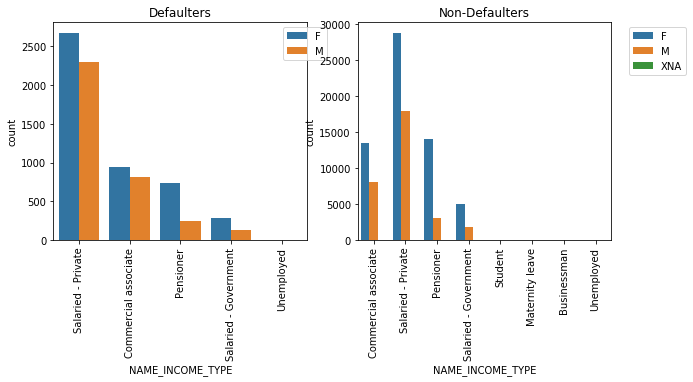

In [104]:
# Analyzing effect of NAME_INCOME_TYPE/CODE_GENDER with Defaulters/Non-Defaulters

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', data = df_app_sample_defaulting_payers)
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', data = df_app_sample_timely_payers)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

* Inference : Females distribution among non defaulting population again here is better than males for all the professions

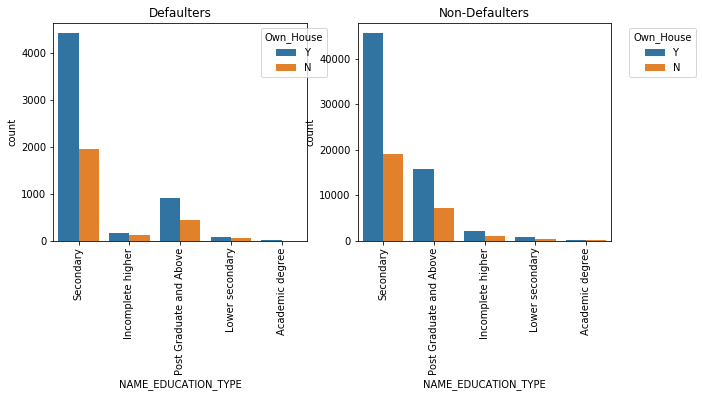

In [105]:
# Analyzing effect of Education Type/Housing Property Ownership with Defaulters/Non-Defaulters

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'FLAG_OWN_REALTY', data = df_app_sample_defaulting_payers)
plt.legend(title='Own_House', bbox_to_anchor=(1.10, 1), loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'FLAG_OWN_REALTY', data = df_app_sample_timely_payers)
plt.legend(title='Own_House', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

* Inference : Population with higher education (Graduate and Above) tends to default less if compared with other education levels

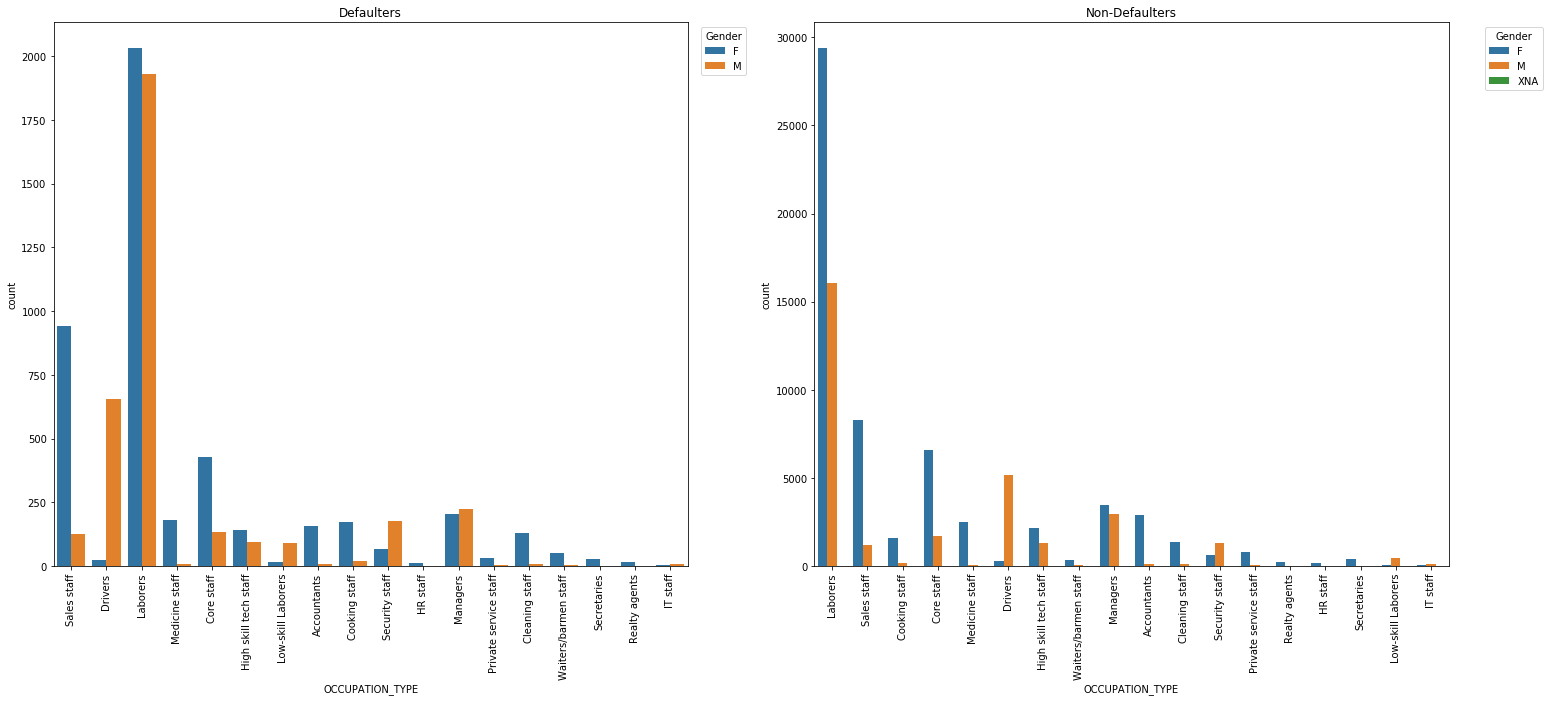

In [106]:
# Analyzing effect of OCCUPATION_TYPE/CODE_GENDER with Defaulters/Non-Defaulters

plt.figure(figsize = (25, 10))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(x = 'OCCUPATION_TYPE', hue = 'CODE_GENDER', data = df_app_sample_defaulting_payers)
plt.legend(title='Gender', bbox_to_anchor=(1.10, 1), loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(x = 'OCCUPATION_TYPE', hue = 'CODE_GENDER', data = df_app_sample_timely_payers)
plt.legend(title='Gender',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

* Inference : Core staff and Sales staff particularly males should be screened thoroughly before giving loan

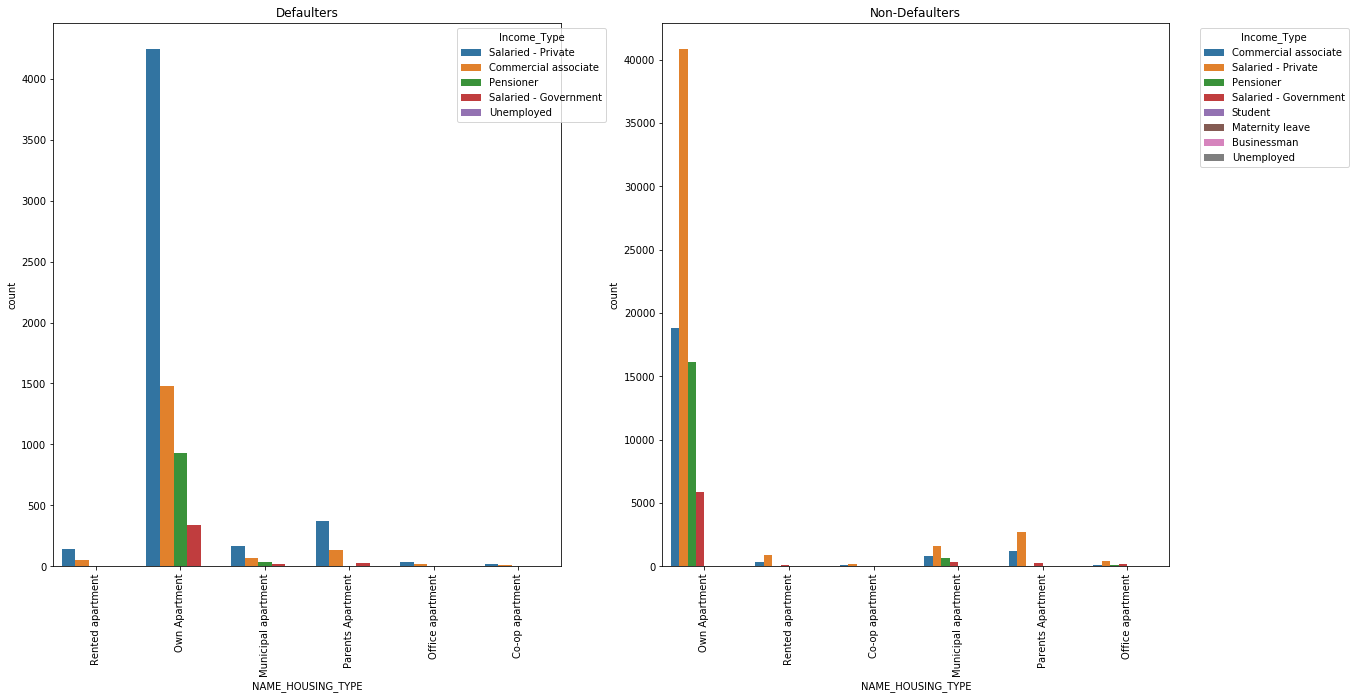

In [107]:
# Analyzing impact of Housing Type/Income Type on Defaulters/Timely Payers

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'NAME_INCOME_TYPE', data = df_app_sample_defaulting_payers)
plt.legend(title='Income_Type', bbox_to_anchor=(1.10, 1), loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'NAME_INCOME_TYPE', data = df_app_sample_timely_payers)
plt.legend(title='Income_Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

* Inference : Government Employees with Own Apartment still default more and Commercial Associates irrescpective of residance/housing type default more than any other group

# *Segment 7 - Merging of both data sets Application with Previous Application Data* 

In [5]:
#Merging the Application Data Set with Previous Application Data Set

df_app_merged = df_app.merge(df_pvapp, on='SK_ID_CURR', how='inner',indicator=True)

In [6]:
df_app_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,_merge
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,both
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,both
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,both
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0,0